# Implementing the SIR-Model of epidemology

### The model

The spread of some types of viruses due to infections can be modeled by the so-called SIR-model. The model works as follows. Let $N$ be the total number of people within a society among which the virus can spread. Then, $N$ is the sum of the stock of susceptible population $S$, the stock of infected population $I$ and the stock of recovered population $R$: 
$$ N = S + I + R \ . $$

Note that $N$ is assumed to be constant, while $S, I$ and $R$ are clearly time-dependent quantities. 

The SIR-model is defined by the following three ordinary differential equations: 
\begin{align}
 \dot{S} &= - \beta SI  \ , \\
 \dot{I} &= \beta SI - \gamma I \ , \\
 \dot{R} &= \gamma I \ .
\end{align}

Here, $\beta$ is a measure for the infection rate, and $\gamma$ for the recovery rate. This model assumes that recovered people are immune against the virus. (Else, the term $\gamma I$ would have to be added to the first differential equation.)

Indeed, the differential equations are made such that $\dot{N}=0$, which can be easily seen by adding those three equations. 

In the following we implement this SIR-model.

### Libraries

In [44]:
import numpy as np
import math
from matplotlib import pyplot as plt

### Parameters and initial conditions 

In [302]:
# Constants 
beta = 4e-8
gamma = 2e-1

# Population 
N = 1e8 
infected = 1e-7 # share of initially infected people 
I = N * infected
S = N - I # R=0
R = N - S - I 

### SIR-Model as a function

In [239]:
# The input of this function is S, I and R as well as beta and gamma, and the end of computation. The output should be a list of susceptible, infected and recovered 
# population at any (discrete) instant in time. 
def SIR_model(susceptible, infectious, recovered, beta, gamma, end):
    S = susceptible
    I = infectious
    R = recovered
    t = 0 # starting point 
    dt = 1/365 # size of time steps
    T = end # end day of computation 
    N = S + I + R
    
    # definition of lists for the purpose of plotting
    S_list = [S/N]
    I_list = [I/N]
    R_list = [R/N]
    time = [t]
    
    # implementing the system of differential equations
    while t < T:
        # updating S, I and R taking into account invariance of N
        S, I, R = max(S - beta*S*I*dt,0), max(I + (beta*S*I - gamma*I)*dt,0), max(R + gamma*I*dt,0) 
        t = t + dt
        
        S_list.append(S/N)
        I_list.append(I/N)
        R_list.append(R/N)
        time.append(t)
        
    return S_list, I_list, R_list, time 

### Creating output by calling the function

In [303]:
S_list, I_list, R_list, time = SIR_model(S, I, R, beta, gamma, 20)

### Plotting the results

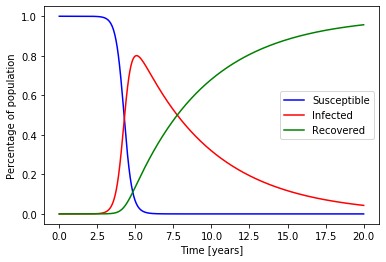

In [304]:
plt.plot(time, S_list, 'b', label = 'Susceptible')
plt.plot(time, I_list, 'r', label = 'Infected')
plt.plot(time, R_list, 'g', label = 'Recovered')
plt.xlabel('Time [years]')
plt.ylabel('Percentage of population')
plt.legend()

### Time of maximal infection

In [305]:
print('After ', time[I_list.index(max(I_list))-1], 'years the point of maximal infection at a rate of', max(I_list)*100,'% is reached.')

After  5.073972602739871 years the point of maximal infection at a rate of 80.07129673099834 % is reached.


The maximum percentage of infection can be calculated analytically. Let $t_*$ be the time at which maximal infection is reached. By definition, $\dot{I}(t_*)=0$. It then follows 
\begin{align}
S(t_* ) = \frac{\gamma}{\beta} \ . 
\end{align}
Dividing the differential equation for $\dot{S}$ by the differential equation of $\dot{R}$, we get 
\begin{align}
\frac{dS}{dR} = - \frac{\beta}{\gamma} S \ .
\end{align}
The solution with $R(0)=0$ is 
\begin{align}
S(t) = S(0) \exp\left[-\frac{\beta}{\gamma}R(t)\right] \ . 
\end{align}
One can then compute how many people have recovered at $t_*$: 
\begin{align}
R(t_* ) = \frac{\gamma}{\beta} \ln \left(\frac{\beta S(0)}{\gamma}\right) \ . 
\end{align}
Since $I = N - S - R$, 
\begin{align}
\frac{I(t_* )}{N} = 1 - \frac{\gamma}{N \beta} \left[ 1 + \ln \left(\frac{\beta S(0)}{\gamma}\right) \right] \ . 
\end{align}

In [301]:
print('Analytical result for the maximum share of infected people:', 100*(1 - (gamma/(N*beta))*(1+np.log(beta*S_list[0]*N/gamma))), '%')

Analytical result for the maximum share of infected people: 80.02133913223007 %
